In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.applications.xception import decode_predictions

%matplotlib inline

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [2]:
learning_rate=0.001
size = 50
drop = 0.2
input_size = 299

In [3]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,)
    #shear_range= 10.0,
    #zoom_range = 0.1,
    #vertical_flip = True)


train_ds = train_gen.flow_from_directory('./train', 
                                         target_size=(input_size,input_size), 
                                         batch_size=32)

valid_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_ds = valid_gen.flow_from_directory('./validation', 
                                         target_size=(input_size,input_size), 
                                         batch_size=32, shuffle=False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [4]:
checkpointing = keras.callbacks.ModelCheckpoint(
    "xception_v5_bigger_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
)

In [5]:
def make_model(input_size = 150, learning_rate=0.01, inner_size=50,dropout_rate = 0.2):
    base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(input_size,input_size,3),
    )
    
    base_model.trainable = False
    #########################################
    inputs = keras.Input(shape=(input_size,input_size,3))
    base = base_model(inputs, training =False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(inner_size, activation='relu')(vectors)
    dropout = keras.layers.Dropout(dropout_rate)(inner)
    outputs = keras.layers.Dense(10)(dropout)
    model = keras.Model(inputs, outputs)
    #################################################
    
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, 
                  loss=loss, 
                  metrics = ['accuracy'])

    return model

In [6]:
learning_rate=0.001
size = 50
drop = 0.2
input_size = 299
    
model = make_model(learning_rate=learning_rate, 
                   inner_size = size, 
                   dropout_rate=drop,
                   input_size=299)
training_history = model.fit(train_ds, epochs=20, validation_data=valid_ds, callbacks=[checkpointing])

Metal device set to: Apple M1


2024-10-31 23:40:02.218110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-31 23:40:02.218249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2024-10-31 23:40:03.715103: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-10-31 23:40:04.745179: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - ETA: 0s - loss: 0.9212 - accuracy: 0.7021

2024-10-31 23:42:44.117842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 [==============================] - 178s 2s/step - loss: 0.9212 - accuracy: 0.7021 - val_loss: 0.5192 - val_accuracy: 0.8387
Epoch 2/20
96/96 [==============================] - 256s 3s/step - loss: 0.4802 - accuracy: 0.8354 - val_loss: 0.4474 - val_accuracy: 0.8592
Epoch 3/20
96/96 [==============================] - 205s 2s/step - loss: 0.3923 - accuracy: 0.8647 - val_loss: 0.4072 - val_accuracy: 0.8710
Epoch 4/20
96/96 [==============================] - 186s 2s/step - loss: 0.3345 - accuracy: 0.8875 - val_loss: 0.3854 - val_accuracy: 0.8739
Epoch 5/20
96/96 [==============================] - 181s 2s/step - loss: 0.2887 - accuracy: 0.9003 - val_loss: 0.3821 - val_accuracy: 0.8563
Epoch 6/20
96/96 [==============================] - 599s 6s/step - loss: 0.2588 - accuracy: 0.9149 - val_loss: 0.3610 - val_accuracy: 0.8886
Epoch 7/20
96/96 [==============================] - 189s 2s/step - loss: 0.2275 - accuracy: 0.9254 - val_loss: 0.3891 - val_accuracy: 0.8651
Epoch 8/20
96/96 [======

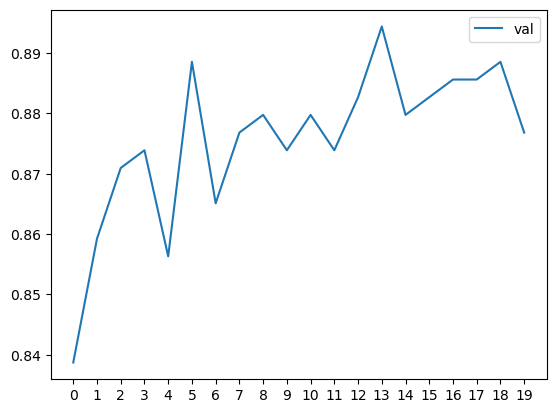

In [21]:
#plt.plot(training_history.history['accuracy'], label = 'train')
plt.plot(training_history.history['val_accuracy'], label = 'val')
plt.xticks(np.arange(20))

plt.legend()

### Loading and Testing Model

In [18]:
model = keras.models.load_model("xception_v5_bigger_14_0.894.h5")

In [19]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory('./test', 
                                         target_size=(input_size,input_size), 
                                         batch_size=32, 
                                         shuffle=False)

Found 372 images belonging to 10 classes.


In [20]:
model.evaluate(test_ds)

2024-11-01 01:15:08.040838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 25s 2s/step - loss: 0.2852 - accuracy: 0.8925


[0.2852199077606201, 0.8924731016159058]

### testing image

In [49]:
current_dir = !pwd
path = current_dir[0]+"/test/outwear/8f8c07c7-b289-41eb-ac43-9bfb8863e0cb.jpg"

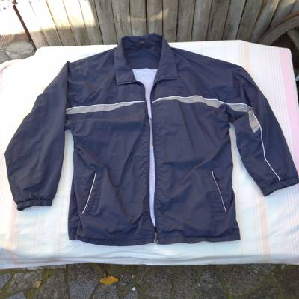

In [50]:
img = load_img(path, target_size=(299,299))
img

In [44]:
x = np.array(img)
x = np.array([x])
x = preprocess_input(x)
x.shape


(1, 299, 299, 3)

In [45]:
pred = model.predict(x)

1/1 [==============================] - 0s 35ms/step


In [46]:
classes = [
    'dress',
     'hat',
     'longsleeve',
     'outwear',
     'pants',
     'shirt',
     'shoes',
     'shorts',
     'skirt']

In [47]:
dict(zip(classes,pred[0]))

{'dress': -0.2725717,
 'hat': -5.0407887,
 'longsleeve': 2.601061,
 'outwear': 6.927734,
 'pants': -2.7503185,
 'shirt': -2.0600762,
 'shoes': -6.73109,
 'shorts': -2.7456503,
 'skirt': -0.90823555}